In [24]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import re

In [25]:
NUM_MAPS = 5
NUM_RECONSTRUCTION = 6
NUM_ACTION_STRATS = 2

In [26]:
strategies = sorted(['without_regularization', 'with_tikhonov_and_identity',
                     'with_tikhonov_and_lambda_identity', 'with_LOG_regularization_and_sparsity_prior', 'with_LOG_regularization_and_zero_prior', 'with_Laplacian_regularization'])  # , 'with_non_negative_least_square'])

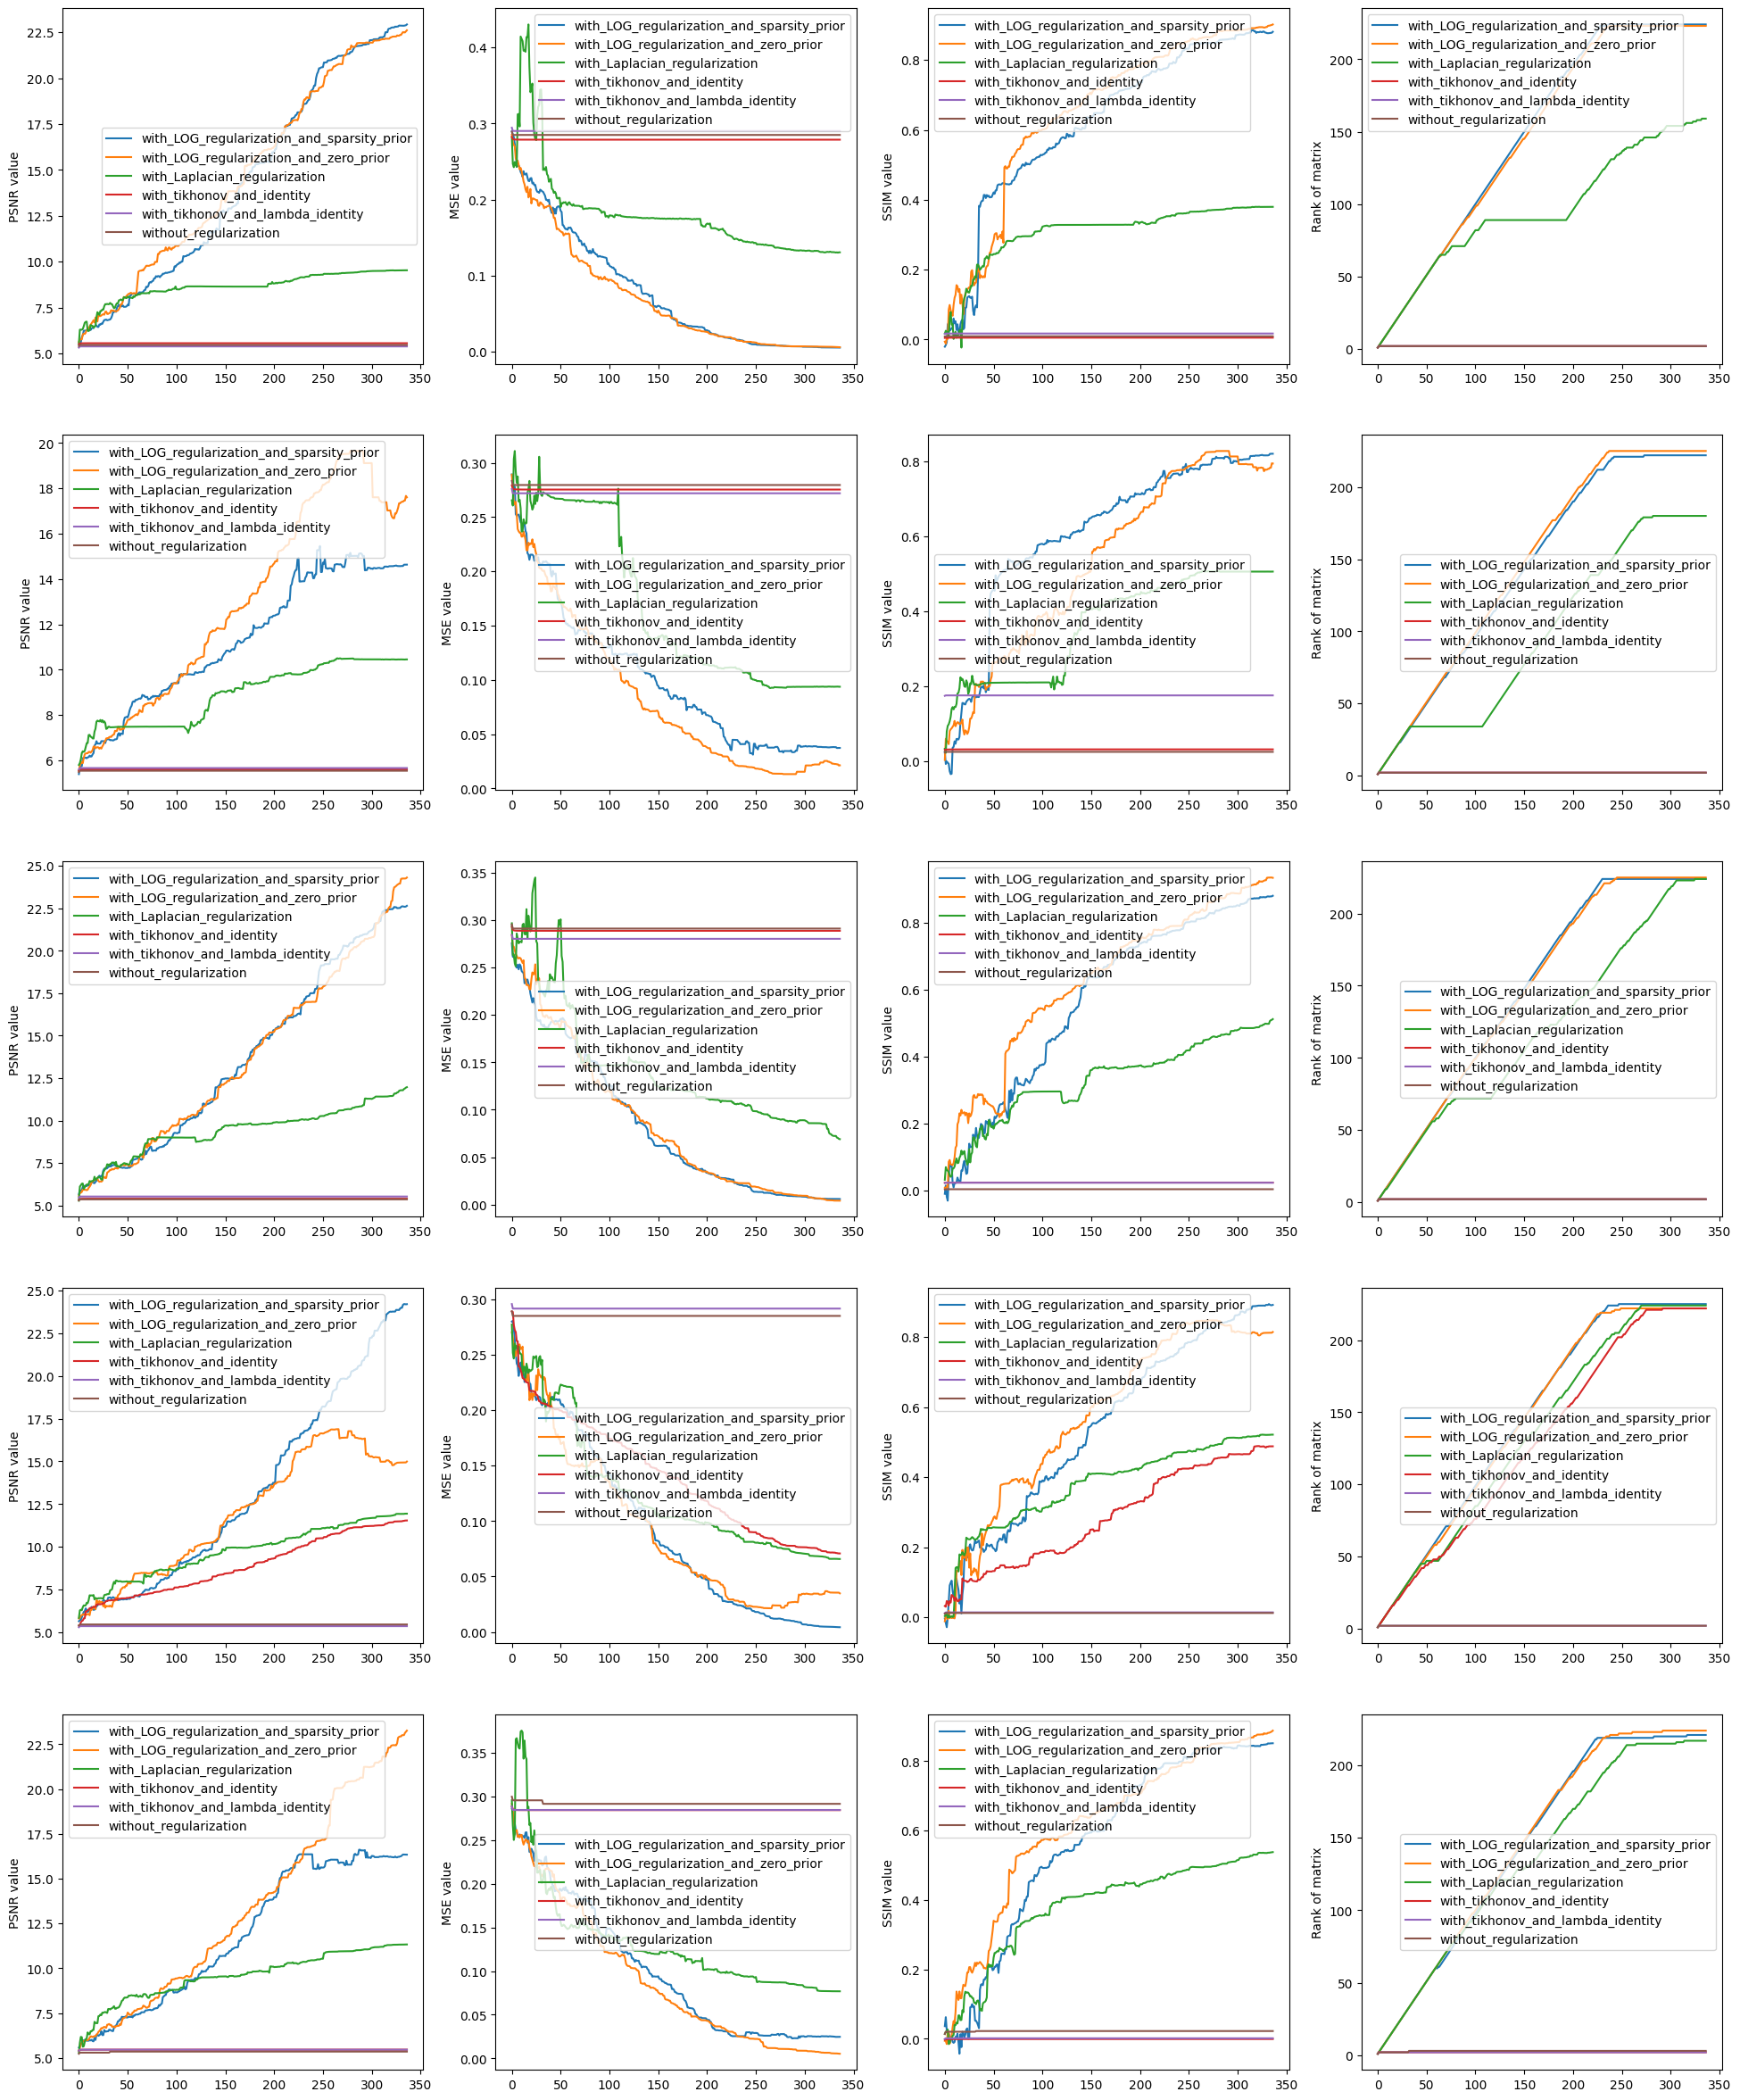

In [27]:
files = sorted(glob.glob('./min*/plots_with*/*.csv'))
dfs = [[pd.read_csv(files[Map + rec*NUM_MAPS]) for Map in range(NUM_MAPS)]
       for rec in range(NUM_RECONSTRUCTION)]

fig, ax = plt.subplots(NUM_MAPS, 4, figsize=(24, 6*NUM_MAPS))

for Map in range(NUM_MAPS):
    psnr_array = []
    mse_array = []
    ssim_array = []
    rank_array = []

    for rec in range(NUM_RECONSTRUCTION):
        psnr_array.append(dfs[rec][Map]['psnr_value'])
        mse_array.append(dfs[rec][Map]['mse_value'])
        ssim_array.append(dfs[rec][Map]['ssim_value'])
        rank_array.append(dfs[rec][Map]['rank'])
    
    psnr_array = np.array(psnr_array)
    mse_array = np.array(mse_array)
    ssim_array = np.array(ssim_array)
    rank_array = np.array(rank_array)

    for rec in range(NUM_RECONSTRUCTION):
        ax[Map][0].plot(psnr_array[rec], label=strategies[rec])
        ax[Map][0].set_ylabel('PSNR value')
        ax[Map][0].grid()
        ax[Map][0].legend()

        ax[Map][1].plot(mse_array[rec], label=strategies[rec])
        ax[Map][1].set_ylabel('MSE value')
        ax[Map][1].grid()
        ax[Map][1].legend()

        ax[Map][2].plot(ssim_array[rec], label=strategies[rec])
        ax[Map][2].set_ylabel('SSIM value')
        ax[Map][2].grid()
        ax[Map][2].legend()

        ax[Map][3].plot(rank_array[rec], label=strategies[rec])
        ax[Map][3].set_ylabel('Rank of matrix')
        ax[Map][3].grid()
        ax[Map][3].legend()
    # handles, labels = ax[Map][0].get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper center')

plt.show()

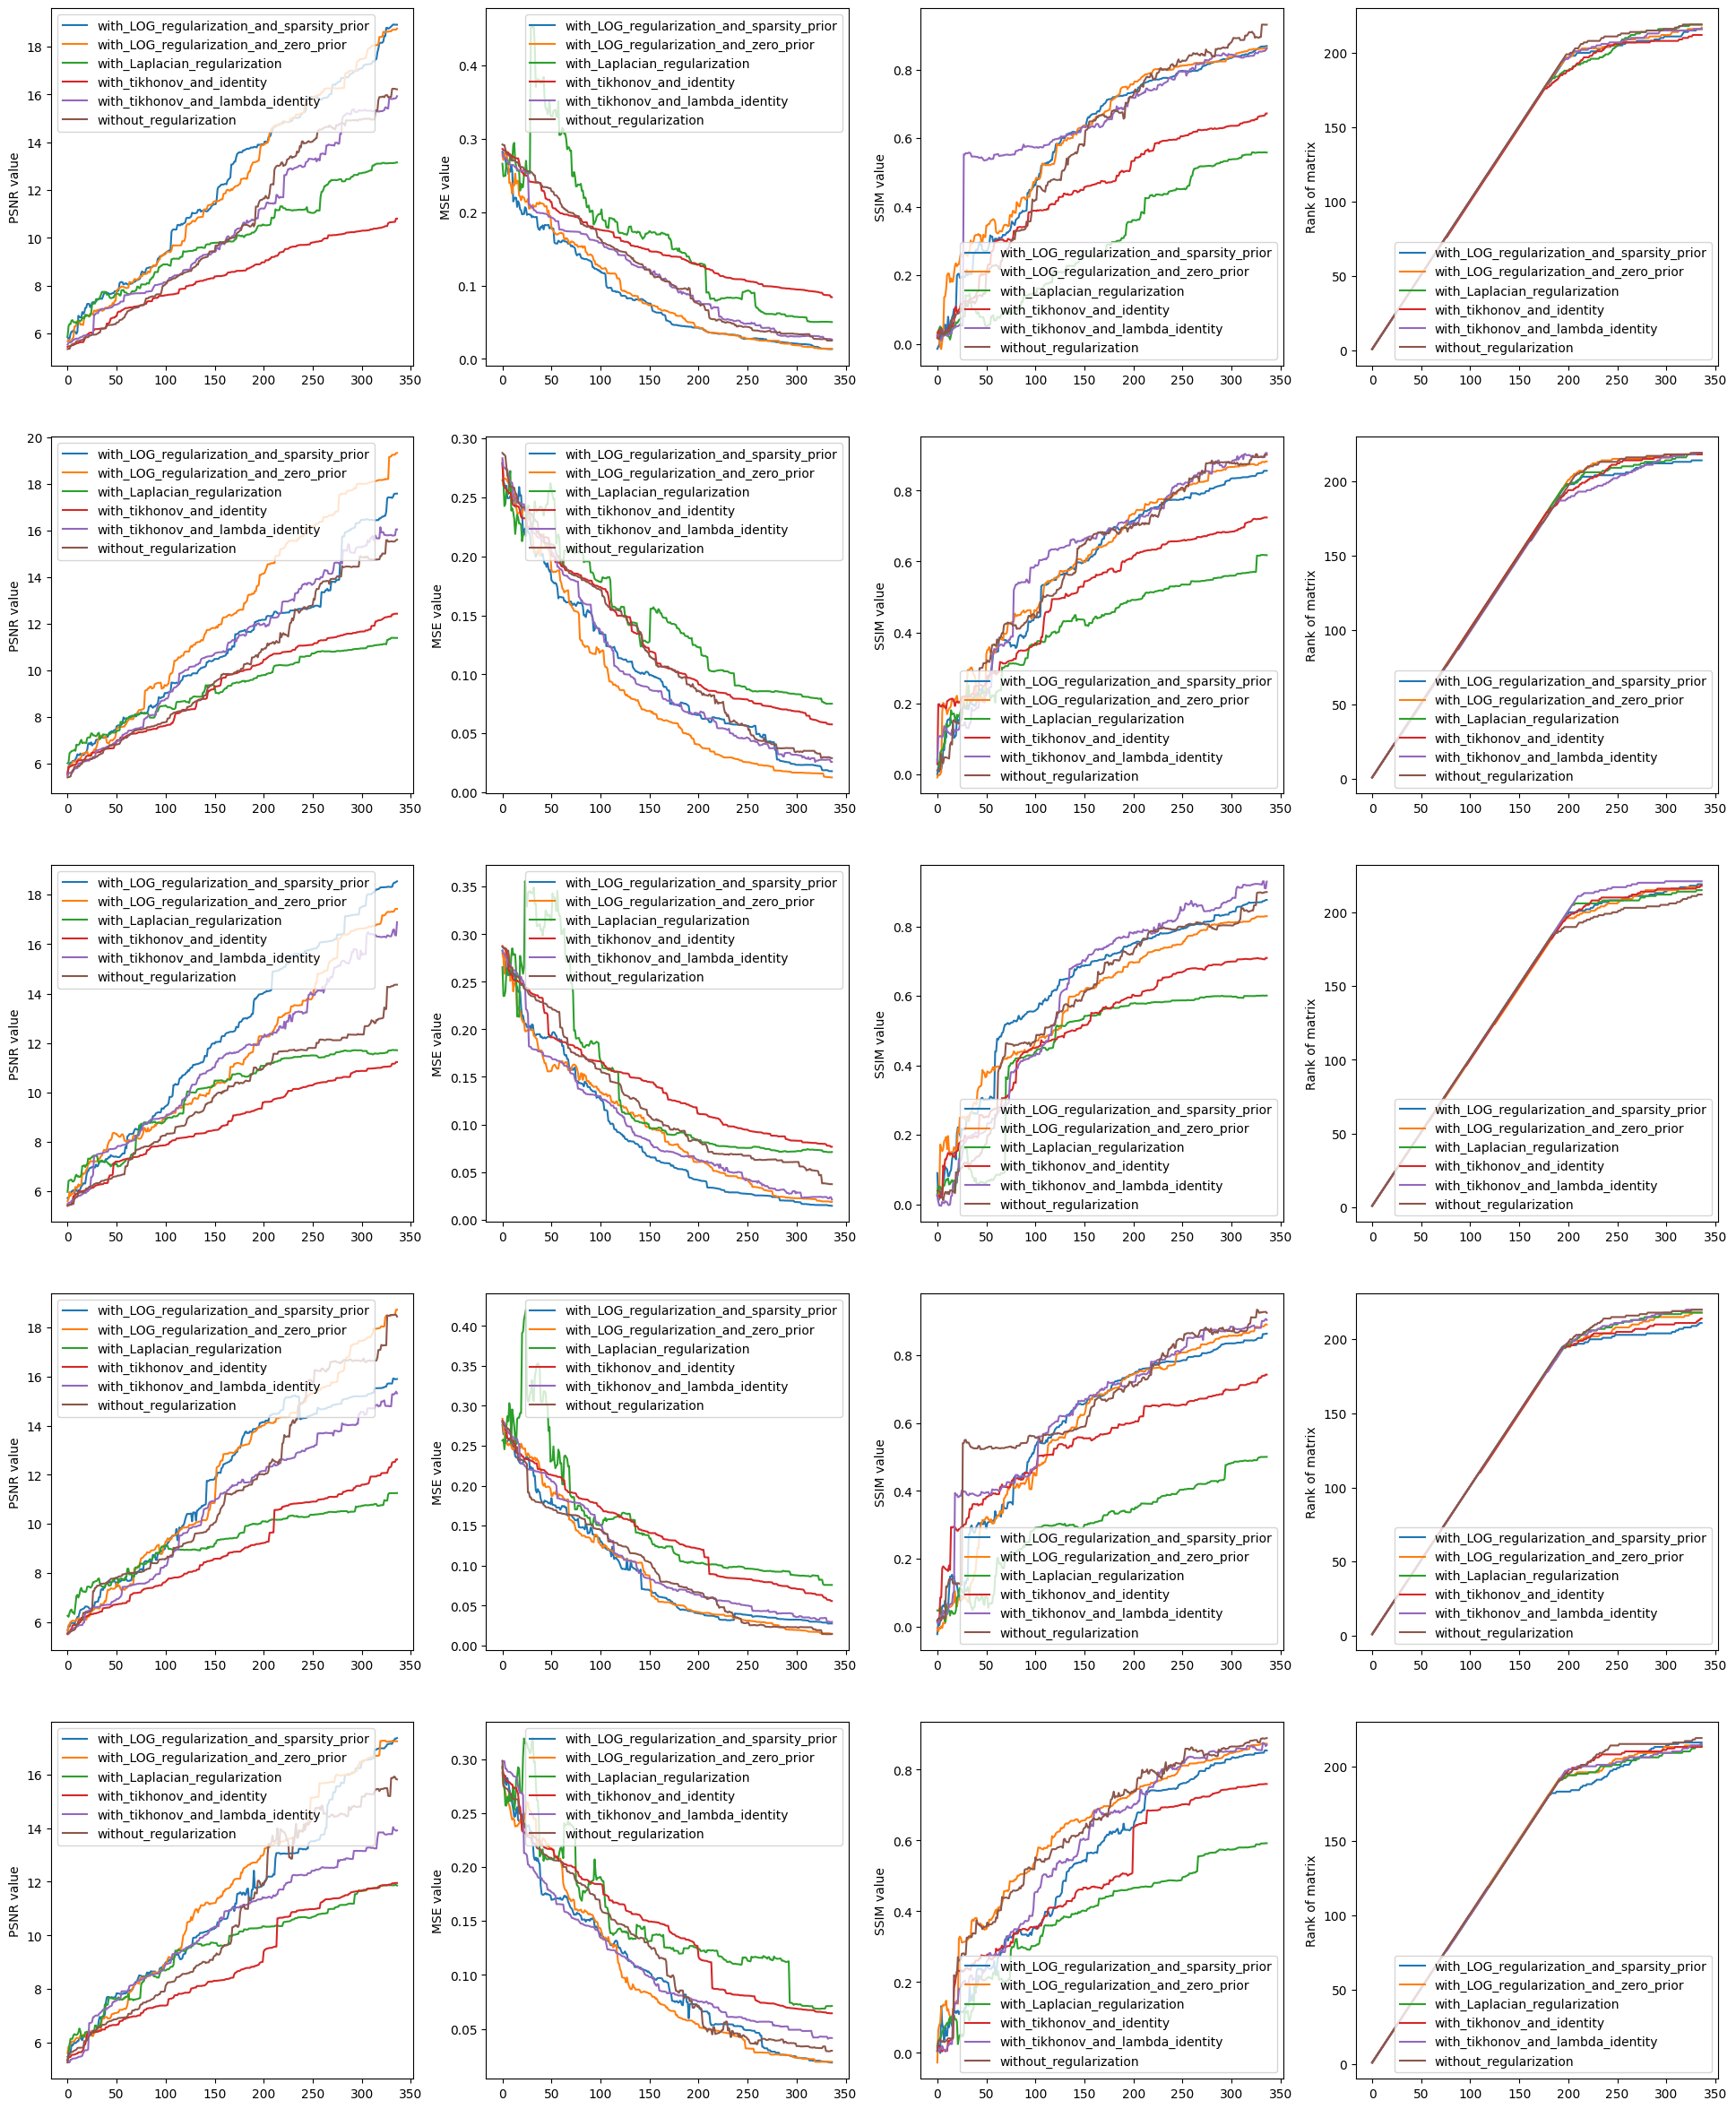

In [23]:
files = sorted(glob.glob('./random/plots_with*/*.csv'))
dfs = [[pd.read_csv(files[Map + rec*NUM_MAPS]) for Map in range(NUM_MAPS)]
       for rec in range(NUM_RECONSTRUCTION)]

fig, ax = plt.subplots(NUM_MAPS, 4, figsize=(24, 6*NUM_MAPS))

for Map in range(NUM_MAPS):
    psnr_array = []
    mse_array = []
    ssim_array = []
    rank_array = []

    for rec in range(NUM_RECONSTRUCTION):
        psnr_array.append(dfs[rec][Map]['psnr_value'])
        mse_array.append(dfs[rec][Map]['mse_value'])
        ssim_array.append(dfs[rec][Map]['ssim_value'])
        rank_array.append(dfs[rec][Map]['rank'])

    psnr_array = np.array(psnr_array)
    mse_array = np.array(mse_array)
    ssim_array = np.array(ssim_array)

    for rec in range(NUM_RECONSTRUCTION):
        ax[Map][0].plot(psnr_array[rec], label=strategies[rec])
        ax[Map][0].set_ylabel('PSNR value')
        ax[Map][0].grid()
        ax[Map][0].legend()

        ax[Map][1].plot(mse_array[rec], label=strategies[rec])
        ax[Map][1].set_ylabel('MSE value')
        ax[Map][1].grid()
        ax[Map][1].legend()

        ax[Map][2].plot(ssim_array[rec], label=strategies[rec])
        ax[Map][2].set_ylabel('SSIM value')
        ax[Map][2].grid()
        ax[Map][2].legend()

        ax[Map][3].plot(rank_array[rec], label=strategies[rec])
        ax[Map][3].set_ylabel('Rank of matrix')
        ax[Map][3].grid()
        ax[Map][3].legend()
plt.show()